In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")

In [32]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"]==2).astype(np.float64)

In [50]:
svm_clf = Pipeline([
    ("Scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X,y)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [52]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [60]:
polynomial_cvm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [62]:
polynomial_cvm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [87]:
def plot_decision_boundary(clf, X, y):
    x0s = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    x1s = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap='Set3')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], 
            color='blue', marker='s', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], 
            color='green', marker='^', label='Class 1')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("Linear SVM classifier using polynomial features")
    plt.show()

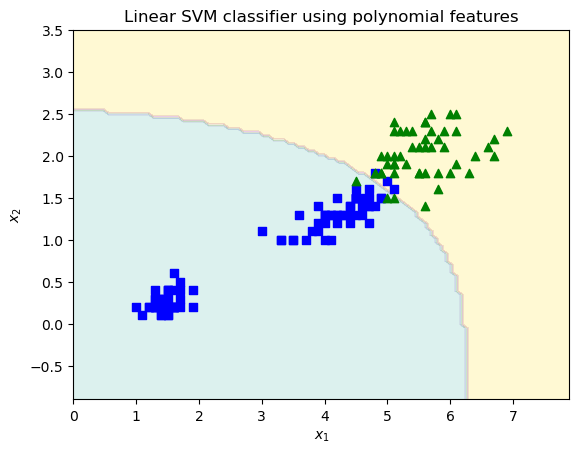

In [89]:
plot_decision_boundary(polynomial_svm_clf, X, y)

In [95]:
poly_kernel_cvm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

In [97]:
poly_kernel_cvm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

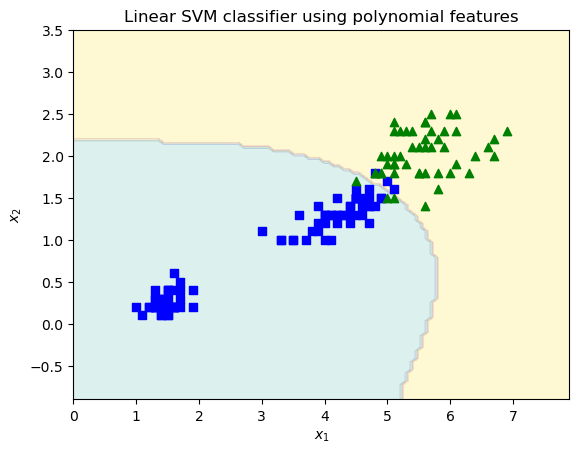

In [101]:
plot_decision_boundary(poly_kernel_cvm_clf, X, y)

In [109]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

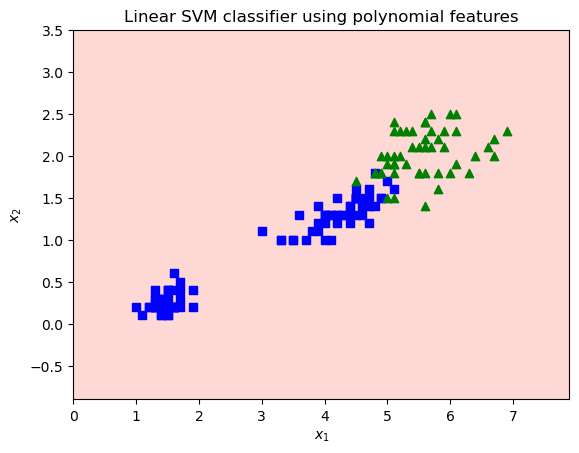

In [113]:
plot_decision_boundary(rbf_kernel_svm_clf, X, y)

In [144]:
svm_reg = LinearSVR(epsilon=0.5)
svm_reg.fit(X,y)
svm_reg.predict([[4, 2]])

array([0.50059663])

In [150]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=1)
svm_poly_reg.fit(X, y)
svm_poly_reg.predict([[4, 2]])

array([0.5])